In [4]:
import pandas as pd

#load the data data_w_genres.csv
data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')
#print data head
print(data_w_genres.head())

           genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1              []                          "Cats" 1983 Broadway Cast   
2              []        "Fiddler On The Roof” Motion Picture Chorus   
3              []     "Fiddler On The Roof” Motion Picture Orchestra   
4              []  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.590111      0.467222  250318.555556  0.394003          0.011400   
1      0.862538      0.441731  287280.000000  0.406808          0.081158   
2      0.856571      0.348286  328920.000000  0.286571          0.024593   
3      0.884926      0.425074  262890.962963  0.245770          0.073587   
4      0.510714      0.467143  270436.142857  0.488286          0.009400   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.290833 -14.448000     0.210

In [5]:
# Check for missing values
print(data_w_genres.isnull().sum())

# Get a summary of the dataset
print(data_w_genres.describe())

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
dtype: int64
       acousticness  danceability   duration_ms        energy  \
count  28680.000000  28680.000000  2.868000e+04  28680.000000   
mean       0.498373      0.546490  2.388780e+05      0.497488   
std        0.370614      0.176474  1.211318e+05      0.254885   
min        0.000000      0.000000  1.879550e+04      0.000000   
25%        0.122296      0.431000  1.823304e+05      0.283568   
50%        0.478458      0.557000  2.186400e+05      0.504000   
75%        0.896000      0.675000  2.684670e+05      0.702783   
max        0.996000      0.986000  5.403500e+06      1.000000   

       instrumentalness      liveness      loudne

# Data Preprocessing
# stabdardize the data by scaling the numerical columns

In [28]:
import pandas as pd

data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')

# Replace empty lists with the string 'Unknown'
data_w_genres['genres'] = data_w_genres['genres'].apply(lambda x: 'Unknown' if x == '[]' else x)

# Check again for empty lists
empty_lists = data_w_genres['genres'].apply(lambda x: x == 'Unknown').sum()
print(f"Number of 'Unknown' genre entries: {empty_lists}")

# check for [] values in genres column
print(data_w_genres['genres'].head())

Number of 'Unknown' genre entries: 9857
0    ['show tunes']
1           Unknown
2           Unknown
3           Unknown
4           Unknown
Name: genres, dtype: object


In [29]:
from sklearn.preprocessing import StandardScaler

# Fit and transform the data
scaler = StandardScaler()

# select features to scale

features_to_scale = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Scale the features

data_w_genres[features_to_scale] = scaler.fit_transform(data_w_genres[features_to_scale])

# print the head of the data
print(data_w_genres.head())


           genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1         Unknown                          "Cats" 1983 Broadway Cast   
2         Unknown        "Fiddler On The Roof” Motion Picture Chorus   
3         Unknown     "Fiddler On The Roof” Motion Picture Orchestra   
4         Unknown  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability  duration_ms    energy  instrumentalness  \
0      0.247535     -0.449184     0.094449 -0.406013         -0.547439   
1      0.982617     -0.593635     0.399588 -0.355776         -0.313665   
2      0.966517     -1.123156     0.743352 -0.827512         -0.503226   
3      1.043025     -0.688023     0.198242 -0.987591         -0.339037   
4      0.033301     -0.449634     0.260532 -0.036105         -0.554140   

   liveness  loudness  speechiness     tempo   valence  popularity  key  mode  \
0  0.627425 -0.573060     1.039205  0.066

# EDA

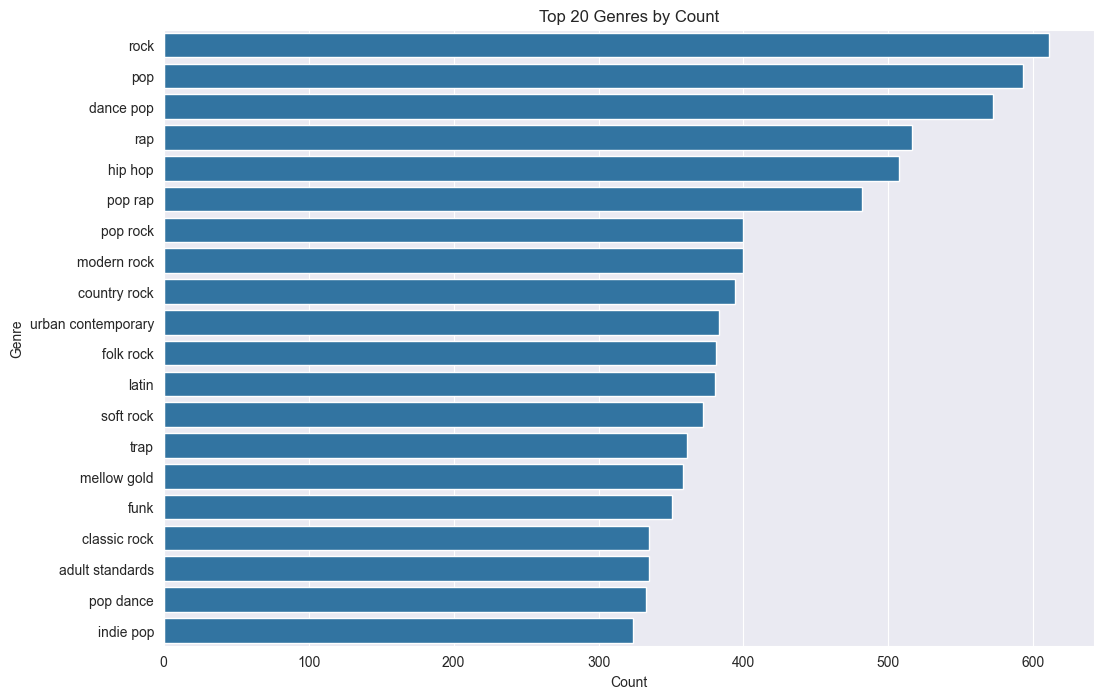

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast  # Abstract Syntax Trees

# Load data
data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')

# Convert the 'genres' column to actual lists
data_w_genres['genres'] = data_w_genres['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Flatten the genre lists into one list
all_genres = [genre for sublist in data_w_genres['genres'] for genre in sublist]

# Count each genre's occurrence
genre_counts = Counter(all_genres)

# Create a DataFrame for the counts
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values('Count', ascending=False)

# Plot the top 20 genres by count
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genre_df.head(20))
plt.title('Top 20 Genres by Count')
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/top_20_genres.png')
plt.show()


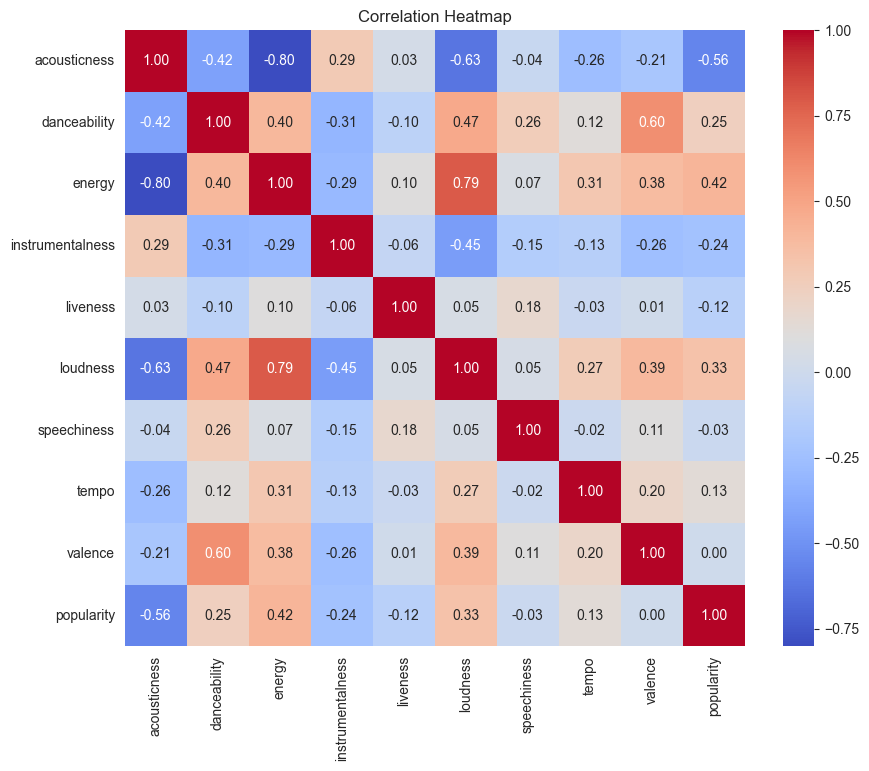

In [75]:
import seaborn as sns

numerical_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Calculate the correlation matrix
corr_matrix = data_w_genres[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/correlation_heatmap_w_genres.png')
plt.show()


A correlation value close to 1 indicates a strong positive correlation, meaning that as one feature increases, the other feature tends to also increase.
A correlation value close to -1 indicates a strong negative correlation, meaning that as one feature increases, the other feature tends to decrease.
A correlation value around 0 indicates no linear relationship between the features.

Acousticness and Energy have a strong negative correlation
Danceability and Valence have a moderately positive correlation
Loudness and Energy have a strong positive correlation
Loudness and Acousticness have a strong negative correlation
Loudness and Speechiness have a strong negative correlation


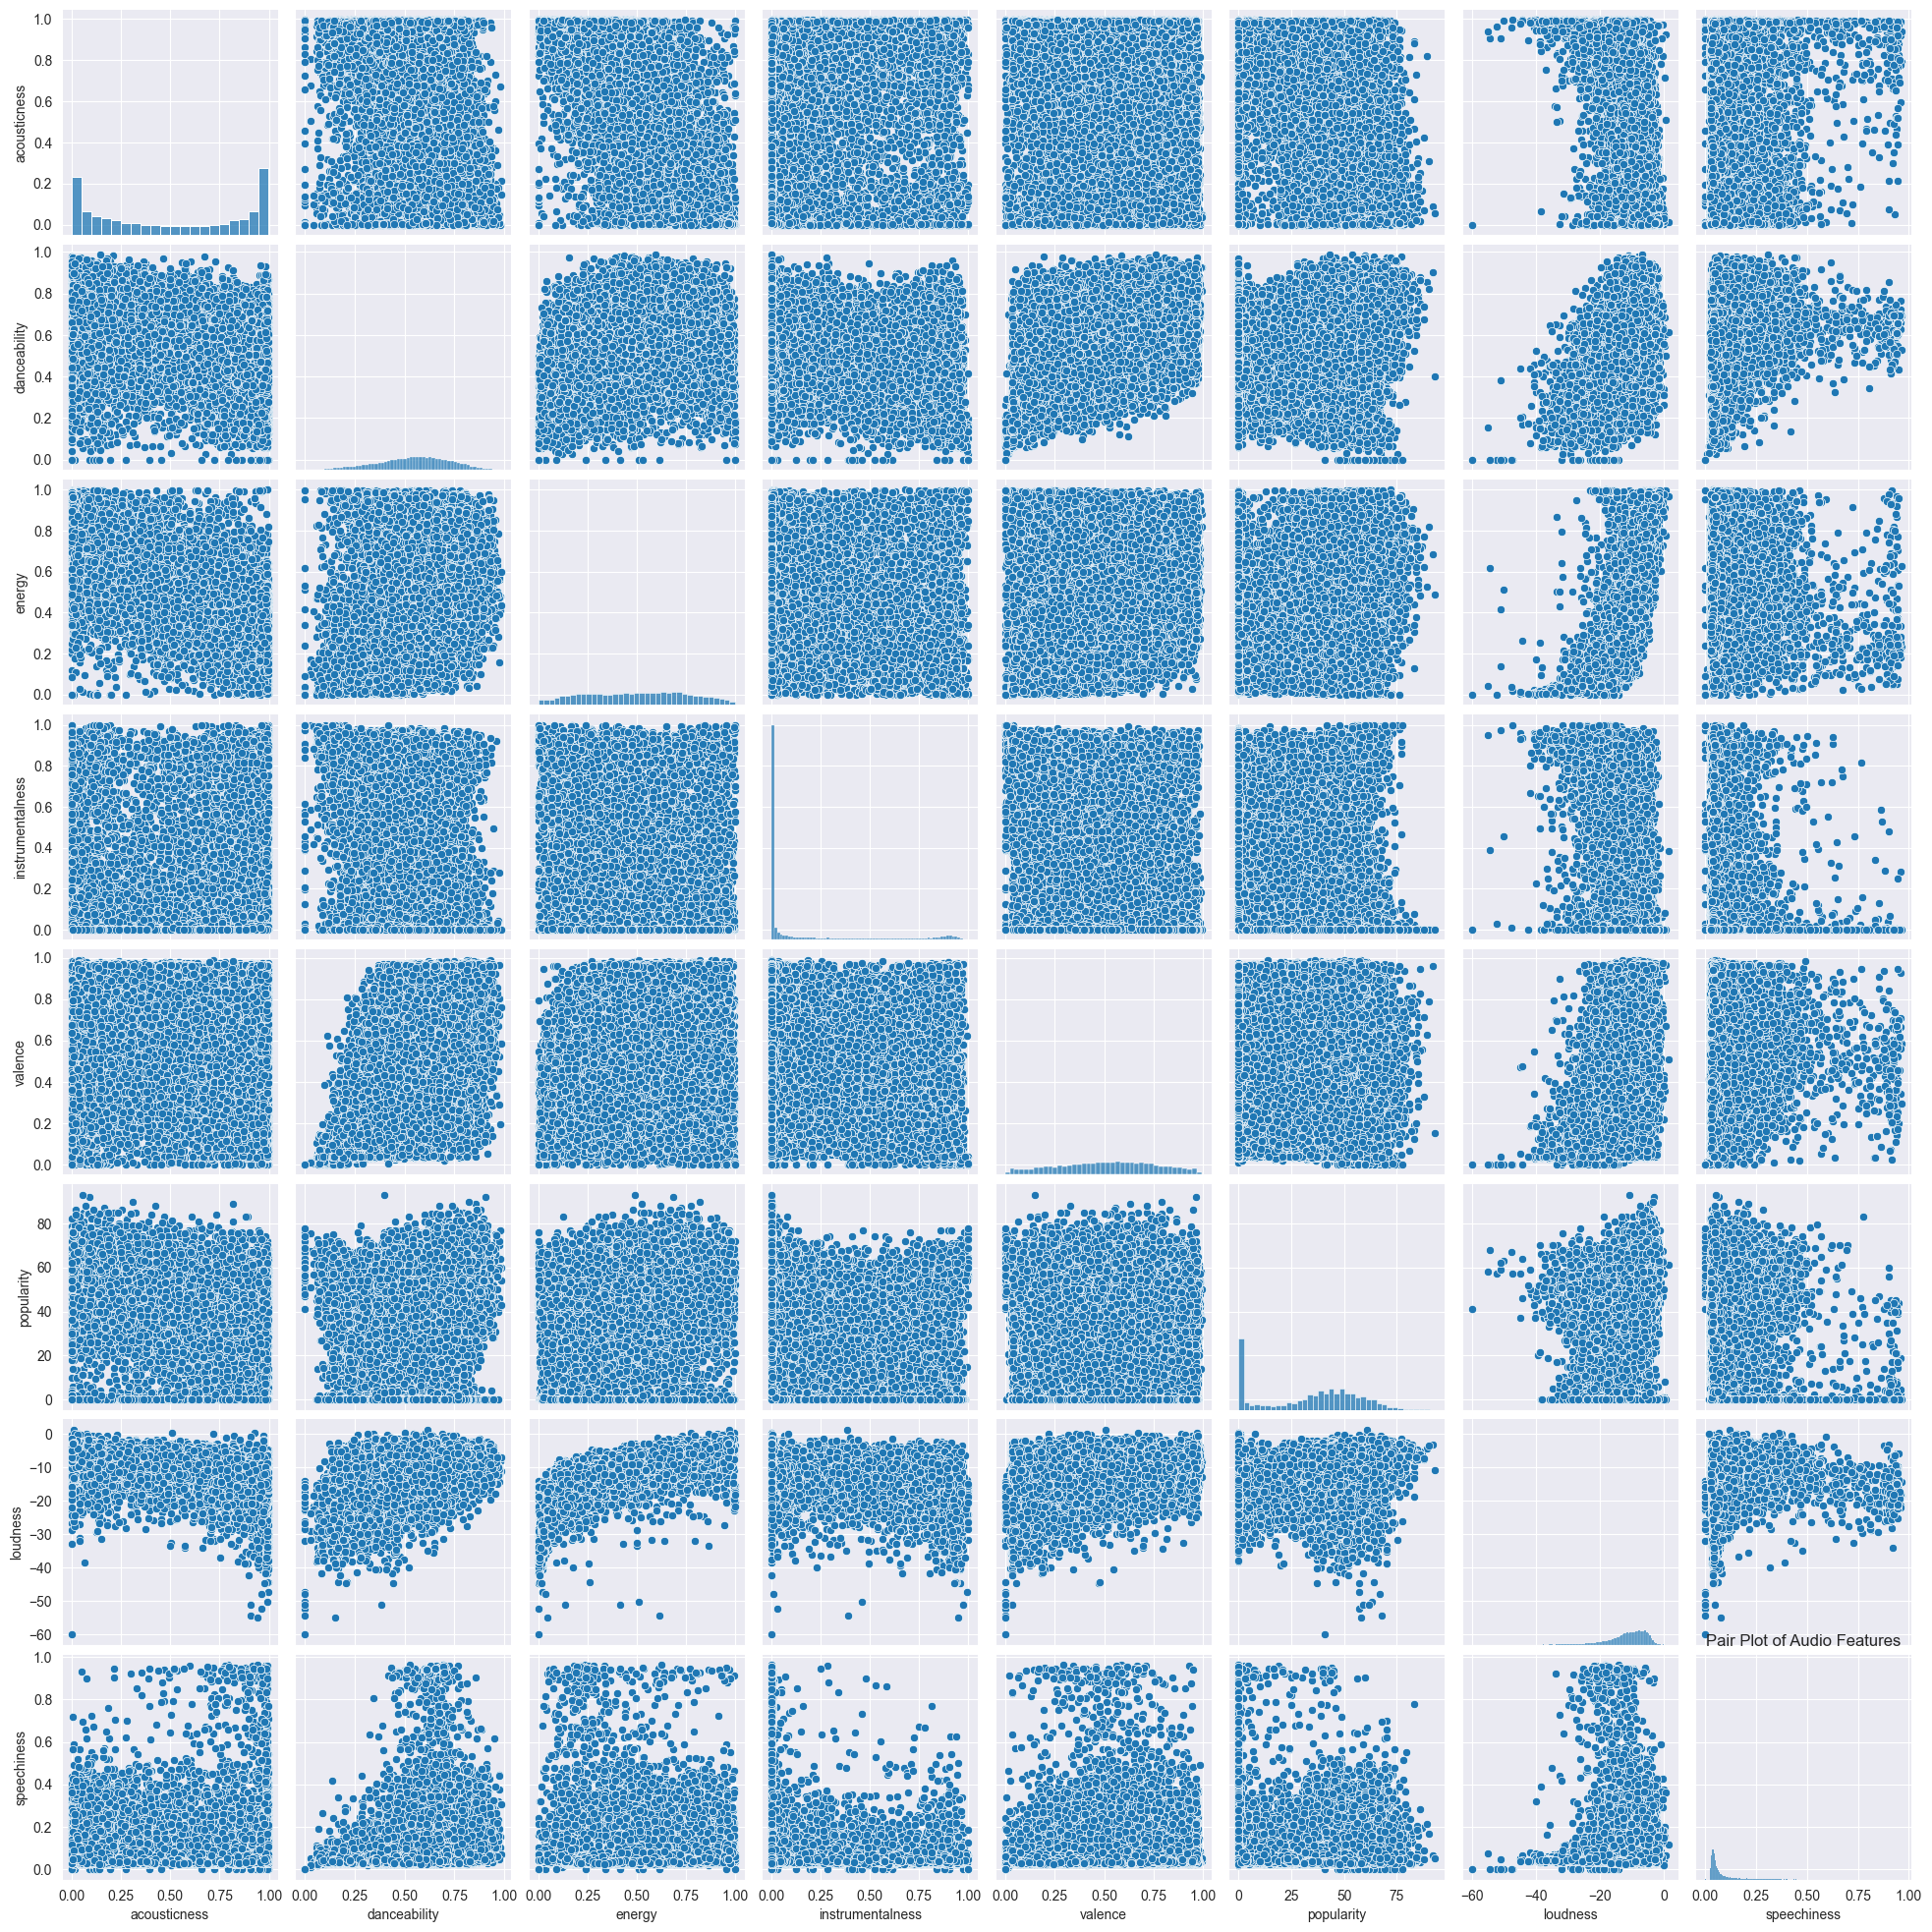

In [49]:
import seaborn as sns

# Selecting a subset of columns for pair plot visualization
selected_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'popularity', 'loudness', 'speechiness']

# Creating pair plot
sns.pairplot(data_w_genres[selected_features])
plt.title('Pair Plot of Audio Features')
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/pair_plot_w_genres.png')
plt.show()


# KMeans Clustering

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')

# Feature Engineering based on identified correlations
data_w_genres['energy_acousticness_interaction'] = data_w_genres['energy'] * data_w_genres['acousticness']
data_w_genres['dance_valence_synergy'] = data_w_genres['danceability'] + data_w_genres['valence']
data_w_genres['loud_energy_interaction'] = data_w_genres['loudness'] * data_w_genres['energy']
data_w_genres['loud_acousticness_interaction'] = data_w_genres['loudness'] * data_w_genres['acousticness']
data_w_genres['loud_speech_interaction'] = data_w_genres['loudness'] * data_w_genres['speechiness']

# Standardize the data
scaler = StandardScaler()
features_to_scale = ['energy', 'acousticness', 'danceability', 'valence', 'loudness', 'speechiness', 
                     'energy_acousticness_interaction', 'dance_valence_synergy',
                     'loud_energy_interaction', 'loud_acousticness_interaction', 
                     'loud_speech_interaction']
scaled_features = scaler.fit_transform(data_w_genres[features_to_scale])

# KMeans Clustering with enhanced features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data_w_genres['enhanced_cluster_label'] = clusters

# Saving the enhanced DataFrame with all new features and clusters
data_w_genres.to_csv('/Users/taief/Desktop/MUSIC REC/data/enhanced_data_with_clusters_w_genre.csv', index=False)

print("Fully enhanced dataset with comprehensive feature engineering and clusters created and saved successfully.")


Fully enhanced dataset with comprehensive feature engineering and clusters created and saved successfully.


In [58]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, clusters)
    silhouette_scores.append((k, score))

# Find the optimal k with the highest silhouette score
optimal_k = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"Optimal number of clusters: {optimal_k}")
#print silhouette scores for different values of k
print(silhouette_scores)

Optimal number of clusters: 3
[(2, 0.3159526163272163), (3, 0.3235643433812307), (4, 0.27311973918016325), (5, 0.2412601535360471), (6, 0.21293030043235786), (7, 0.2153547801062901), (8, 0.21760234739723883), (9, 0.2201910881766894), (10, 0.21221678440867187)]


#PCA Analysis

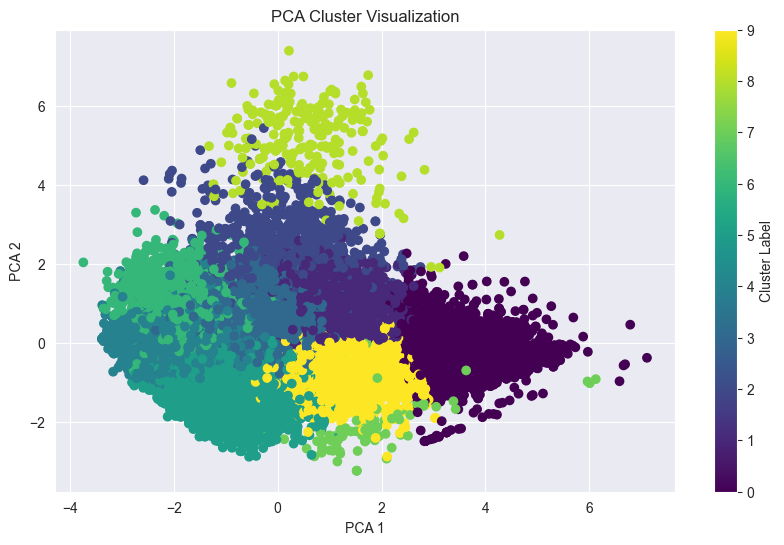

In [61]:
#import pca library
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('PCA Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster Label')
plt.show()


   acousticness  danceability    energy  instrumentalness   valence  \
0      0.870191      0.368429  0.228412          0.766881  0.322283   
1      0.440343      0.688434  0.535639          0.036050  0.583752   
2      0.826348      0.461822  0.289736          0.067755  0.428050   
3      0.126433      0.528976  0.723238          0.127946  0.409624   
4      0.302712      0.693374  0.644750          0.066173  0.749004   

   speechiness  
0     0.054565  
1     0.414742  
2     0.064585  
3     0.071213  
4     0.081505  


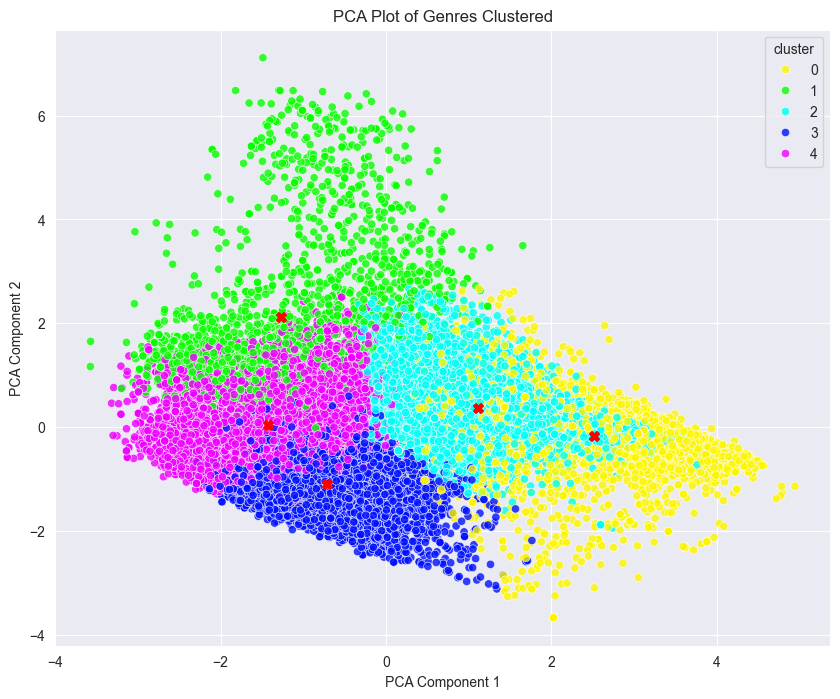

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')

# Preprocessing: Replace empty genre lists with 'Unknown'
data_w_genres['genres'] = data_w_genres['genres'].apply(lambda x: 'Unknown' if x == '[]' else x)

# Select features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'speechiness']
X = data_w_genres[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data_w_genres['cluster'] = kmeans.fit_predict(X_scaled)

# Calculate and interpret centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features)
print(centroids_df)

# Define a labeling function based on centroids
def label_genre_clusters(row):
    labels = []
    if row['acousticness'] > 0.5:
        labels.append('High Acousticness')
    if row['energy'] > 0.5:
        labels.append('High Energy')
    if row['danceability'] > 0.5:
        labels.append('High Danceability')
    if row['valence'] > 0.5:
        labels.append('High Valence')
    if row['speechiness'] > 0.5:
        labels.append('High Speechiness')
    
    # Combine labels if multiple conditions are met, or label as 'Mixed' if none
    return ', '.join(labels) if labels else 'Mixed'

centroids_df['label'] = centroids_df.apply(label_genre_clusters, axis=1)

# Map the labels from centroids to each genre in the original DataFrame
cluster_labels = centroids_df['label'].to_dict()
data_w_genres['cluster_label'] = data_w_genres['cluster'].map(cluster_labels)

# Visualize with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data_w_genres['pca_one'] = pca_result[:,0]
data_w_genres['pca_two'] = pca_result[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="cluster",
    palette=sns.color_palette("hsv", 5),
    data=data_w_genres,
    legend="full",
    alpha=0.8
)

# Plot centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c='red', s=50, marker='X')

# Save the enhanced dataset
data_w_genres.to_csv('/Users/taief/Desktop/MUSIC REC/data/enhanced_data_with_clusters_genre.csv', index=False)

plt.title('PCA Plot of Genres Clustered')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/pca_genres_clusters_visualization.png', dpi=300)
plt.show()


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_w_genres = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_w_genres.csv')

# Preprocessing: Replace empty genre lists with 'Unknown'
data_w_genres['genres'] = data_w_genres['genres'].apply(lambda x: 'Unknown' if x == '[]' else x)

# Select features for clustering
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'valence', 'speechiness', 'loudness']
X = data_w_genres[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means Clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
data_w_genres['cluster'] = kmeans.fit_predict(X_scaled)

# Calculate and interpret centroids
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(scaler.inverse_transform(centroids), columns=features)

# labeling function based on centroids
# Define a labeling function based on centroids
def label_genre_clusters(row):
    if row['acousticness'] > 0.5 and row['energy'] < 0.5 and row['loudness'] < -10:
        return 'Acoustic & Lyrical'
    elif row['energy'] > 0.5 and row['danceability'] > 0.5 and row['loudness'] > -5:
        return 'Energetic & Danceable'
    elif (0.25 <= row['acousticness'] <= 0.75) and (0.25 <= row['energy'] <= 0.75) and (-15 < row['loudness'] < -5):
        return 'Balanced'
    else:
        return 'Varied'


# Apply labels to centroids
centroids_df['cluster_label'] = centroids_df.apply(label_genre_clusters, axis=1)
cluster_labels = centroids_df['cluster_label'].to_dict()


# Map the labels from centroids to each genre in the original DataFrame
data_w_genres['cluster_label'] = data_w_genres['cluster'].map(cluster_labels)

# Visualize with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data_w_genres['pca_one'] = pca_result[:,0]
data_w_genres['pca_two'] = pca_result[:,1]

plt.figure(figsize=(10,8))
sns.scatterplot(
    x="pca_one", y="pca_two",
    hue="cluster_label",
    palette=sns.color_palette("hsv", len(cluster_labels)),
    data=data_w_genres,
    legend="full",
    alpha=0.8
)

# Plot centroids
centroids_pca = pca.transform(centroids)
for i, center in enumerate(centroids_pca):
    plt.scatter(center[0], center[1], c='red', s=200, marker='X')
    plt.text(center[0], center[1], cluster_labels[i], color='red')

# Save the enhanced dataset
data_w_genres.to_csv('/Users/taief/Desktop/MUSIC REC/data/enhanced_data_with_clusters_genre2.csv', index=False)

plt.title('PCA Plot of Genres Clustered')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.savefig('/Users/taief/Desktop/MUSIC REC/plot/pca_genres_clusters_visualization.png', dpi=300)
plt.show()
